### Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#(a)

def p_gaussian(x,mean,var):
    mu = mean
    sigma_square = var
    p = (1/(np.sqrt(2*np.pi*sigma_square))) * np.exp(-(np.square(x-mu))/(2*sigma_square))
    return p

#Computer code implementing mh
def mh(p_star, param_init, num_samples=5000, step_size=1.0):
    #i = 1
    theta_1 = param_init
    theta_current = theta_1
    L = num_samples
    #samples = [theta_1]
    samples = np.array([])
    samples = np.append(samples, theta_current)
    samples = samples.reshape(len(param_init),1)
    #theta_prev = theta_1
    theta_prev = theta_1
    #i = 2 to i = L
    for i in np.arange(2,L+1,1):
        theta_cand = np.array([])
        for k in range(param_init.shape[0]):
            q_tailed_given_cand = 1
            q_tailed_given_prev = 1
            #draw a sample theta_cand_k
            theta_cand_k = np.random.normal(loc=theta_current[k], scale=step_size)
            #multiply 1
            q_tailed_given_prev *= p_gaussian(theta_cand_k,mean=theta_current[k],var=step_size)
            #multiply 2
            q_tailed_given_cand *= p_gaussian(theta_prev[k],mean=theta_cand_k,var=step_size)
            #append theta_cand_k to theta_cand
            theta_cand = np.append(theta_cand, theta_cand_k)
        a = (q_tailed_given_cand * p_star(theta_cand)) / (q_tailed_given_prev * p_star(theta_prev))
        if a >= 1:
            theta_current = theta_cand
        else:
            u = np.random.uniform(low=0,high=1)
            if u < a:
                theta_current = theta_cand
            else:
                theta_current = theta_prev
        #Store and update as: samples = [theta_1, ..., theta_i]
        samples = np.concatenate((samples, theta_current.reshape(len(param_init),1)), axis=1)
        theta_prev = theta_current
    return samples

In [3]:
#(b)

#define p_star
def p_star_gaussian(x):
    #pdf of multi-variate gaussian
    x_mean = np.zeros(len(x))
    x_var = np.ones(len(x))
    p = 1
    for k in range(x.shape[0]):
        p *= p_gaussian(x[k], x_mean[k], x_var[k])
    return p

In [25]:
#draw 5000 samples initialized at x=0,y=0
samples_1 = mh(p_star_gaussian, param_init=np.array([0,0]))
x_1 = samples_1[0]
y_1 = samples_1[1]
x_11 = samples_1[0][:20]
y_11 = samples_1[1][:20]

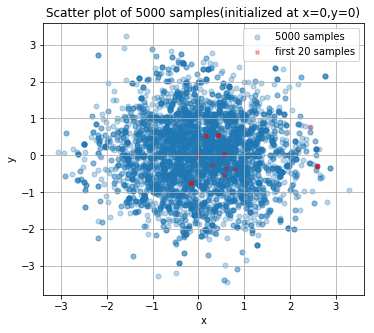

In [39]:
#scatter plot
ax = plt.figure().add_subplot(111)
ax.grid(True)

fig = plt.gcf()
fig.set_size_inches(5.75,5)
plt.scatter(x_1,y_1,alpha=0.3,s=25,label='rest of 5000 samples')
plt.scatter(x_11,y_11,s=15,c='r',alpha=0.3,marker='X',label='first 20 samples')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of 5000 samples(initialized at x=0,y=0)')
plt.legend()
plt.show()

In [63]:
print('Mean of first 20 samples of x:%s'%np.average(x_11))

Mean of first 20 samples of x:0.7258636411917032


Description:

The first 20 samples alone can not adequately approximate the true density because the amount of samples is too small and it is affected by randomness a lot, although, in this case, the initial proposal distribution q is exactly the same as the true density.

In [30]:
#draw 5000 samples initialized at x=7,y=7
samples_2 = mh(p_star_gaussian, param_init=np.array([7,7]))
x_2 = samples_2[0]
y_2 = samples_2[1]
x_22 = samples_2[0][:20]
y_22 = samples_2[1][:20]

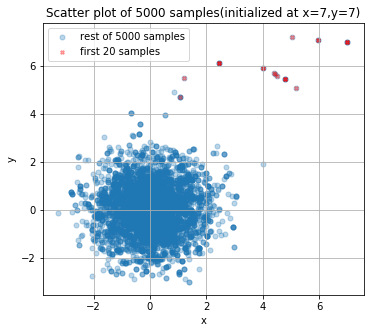

In [40]:
#scatter plot
ax = plt.figure().add_subplot(111)
ax.grid(True)

fig = plt.gcf()
fig.set_size_inches(5.75,5)
plt.scatter(x_2,y_2,alpha=0.3,s=25,label='rest of 5000 samples')
plt.scatter(x_22,y_22,alpha=0.3,s=15,c='r',marker='X',label='first 20 samples')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of 5000 samples(initialized at x=7,y=7)')
plt.legend()
plt.show()

In [13]:
#mh function with additional warm-up argument
def mh_wramup(p_star, param_init, num_samples=5000, step_size=1.0, W=0):
    #i = 1
    theta_1 = param_init
    theta_current = theta_1
    
    #extend L
    L = num_samples + W
    
    #samples = [theta_1]
    samples = np.array([])
    samples = np.append(samples, theta_current)
    samples = samples.reshape(len(param_init),1)
    #theta_prev = theta_1
    theta_prev = theta_1
    #i = 2 to i = L
    for i in np.arange(2,L+1,1):
        theta_cand = np.array([])
        for k in range(param_init.shape[0]):
            q_tailed_given_cand = 1
            q_tailed_given_prev = 1
            #draw a sample theta_cand_k
            theta_cand_k = np.random.normal(loc=theta_current[k], scale=step_size)
            #multiply 1
            q_tailed_given_prev *= p_gaussian(theta_cand_k,mean=theta_current[k],var=step_size)
            #multiply 2
            q_tailed_given_cand *= p_gaussian(theta_prev[k],mean=theta_cand_k,var=step_size)
            #append theta_cand_k to theta_cand
            theta_cand = np.append(theta_cand, theta_cand_k)
        a = (q_tailed_given_cand * p_star(theta_cand)) / (q_tailed_given_prev * p_star(theta_prev))
        
        
        if a >= 1:
            theta_current = theta_cand
        else:
            u = np.random.uniform(low=0,high=1)
            if u < a:
                theta_current = theta_cand
            else:
                theta_current = theta_prev
        #samples = [theta_1, ..., theta_i]
        samples = np.concatenate((samples, theta_current.reshape(len(param_init),1)), axis=1)
        theta_prev = theta_current
        
        #clear warmup samples
        if i == (W+1):
            samples = samples[:,W:]
        
    return samples

In [14]:
#(c)

#define p_star of posterior density of (alpha,beta)
def p_star_poisson(theta):
    alpha, beta = theta
    #load poisson data
    data = np.loadtxt('q3_poisson.txt')
    x, y = data
    
    p_likelihood = 1
    for i in range(len(x)):
        mu = np.exp((alpha * x[i] + beta))
        p_likelihood *= stats.poisson.pmf(y[i],mu)
    #expression of p_star
    p_star_poisson = p_likelihood * stats.multivariate_normal.pdf(np.array([alpha,beta]),mean=np.array([0,0]),cov=np.diag(np.array([100,100])))
    return p_star_poisson

In [43]:
#draw 5000 poisson samples
samples_3 = mh_wramup(p_star_poisson, param_init=np.array([0,0]), step_size=1, W=1000)

No handles with labels found to put in legend.


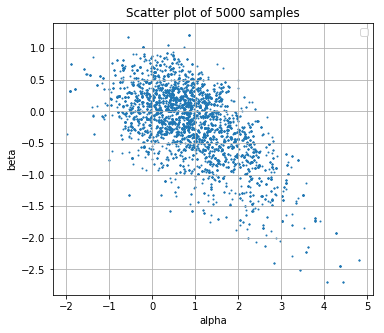

In [45]:
#plot
ax = plt.figure().add_subplot(111)
ax.grid(True)

x_3 = samples_3[0]
y_3 = samples_3[1]

fig = plt.gcf()
fig.set_size_inches(5.75,5)
plt.scatter(x_3,y_3,s=1)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Scatter plot of 5000 samples')
plt.legend()
plt.show()

In [47]:
#mean
alpha_posterior_mean = np.average(x_3)
beta_posterior_mean = np.average(y_3)
print('Alpha posterior mean:%s'%alpha_posterior_mean)
print('Beta posterior mean:%s'%beta_posterior_mean)

#correlation coefficient
corrcoef = np.corrcoef(samples_3)
print('Correlation coefficient:%s'%corrcoef)

Alpha posterior mean:0.8653795360077177
Beta posterior mean:-0.16935594327792133
Correlation coefficient:[[ 1.         -0.61858799]
 [-0.61858799  1.        ]]


# (d)

Statements:

The stepsize in Figure 2c should be larger than the one in Figure 2a and the stepsize in Figure 2b should be smaller than the one in Figure 2a.


Explanations:

(Here we only talk about one type of cases, and the other vice versa.)

In terms of the effect of stepsize:
When the stepsize is relatively large, the sample θnew at the next moment has relatively high probability to be far away from the one at current moment θold, which is the mean of q (Gaussian proposal distribution) at current iteration.

In terms of the workings of the Metropolis Hastings algorithm:
For the situation above, it is more likely that density of interest of the new sample, p*(θnew), is smaller than the current sample’s, p*(θold), which increases the probability that the Metropolis Hasting algorithm rejects the new sample θnew. So as the iteration grows, the trace plot is more likely to stay at the previous value rather than change to the other. Hence, there are more straight lines in the trace plot of Figure 2c.

Therefore, for the other case, the trace plot of Figure 2b looks more wiggly than the one of Figure 2a, and has smaller movements between close iterations than Figure 2a.

In [56]:
#We also make demos of several trace plots of different step size below.

#blue
#step size = 1
t_1 = [t for t in np.arange(0,5000,1)] 

#red
#step size = 5
sample_4 = mh_wramup(p_star_poisson, param_init=np.array([0,0]), step_size=5, W=1000)
y_4 = sample_4[1]

#green
#step size = 0.2
sample_5 = mh_wramup(p_star_poisson, param_init=np.array([0,0]), step_size=0.05, W=1000)
y_5 = sample_5[1]

No handles with labels found to put in legend.


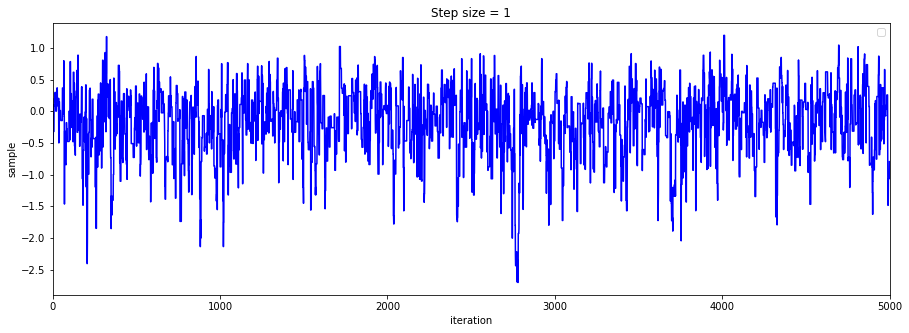

In [65]:
#plot
plt.xlim(0,5000)
fig = plt.gcf()
fig.set_size_inches(15,5)

plt.xlabel('iteration')
plt.ylabel('sample')
plt.title('Step size = 1')
plt.legend()

plt.plot(t_1,y_3,color='b')

No handles with labels found to put in legend.


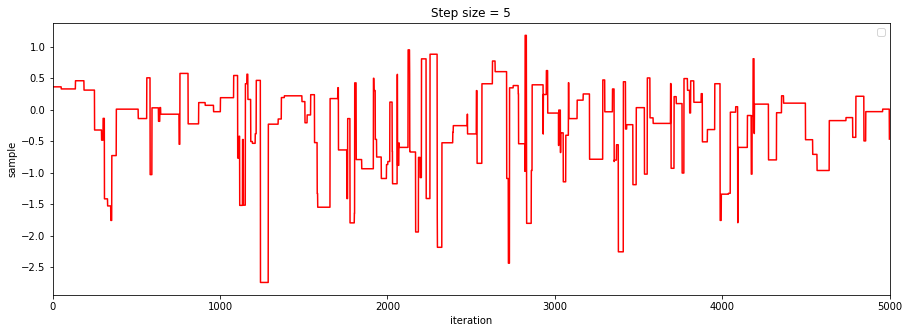

In [58]:
plt.xlim(0,5000)
fig = plt.gcf()
fig.set_size_inches(15,5)

plt.xlabel('iteration')
plt.ylabel('sample')
plt.title('Step size = 5')
plt.legend()

plt.plot(t_1,y_4,color='r')
plt.show()

No handles with labels found to put in legend.


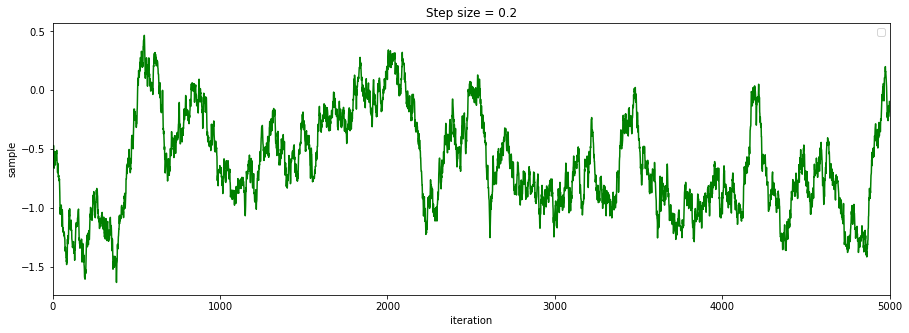

In [59]:
plt.xlim(0,5000)
fig = plt.gcf()
fig.set_size_inches(15,5)

plt.xlabel('iteration')
plt.ylabel('sample')
plt.title('Step size = 0.2')
plt.legend()

plt.plot(t_1,y_5,color='g')
plt.show()